In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("no problem")

no problem


In [2]:
data = pd.read_csv("./dataset_my/simple.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      9 non-null      int64
 1   GPA     9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


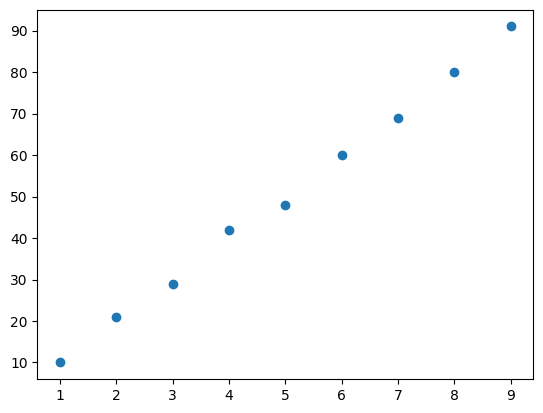

In [4]:
plt.scatter(data.ID,data.GPA)
plt.show()

In [5]:
from torch import nn

In [6]:
X = data.ID.values.reshape(-1,1).astype(np.float32) #返回什么值与输出什么值好像不同
x = torch.from_numpy(X)

In [7]:
Y = data.GPA.values.reshape(-1,1).astype(np.float32) #返回什么值与输出什么值好像不同
y = torch.from_numpy(Y)

In [8]:
model = nn.Linear(1,1) #out = w@in + b

In [9]:
loss_function = nn.MSELoss() #MSE(mean square error) 均方误差

In [10]:
opt =torch.optim.SGD(model.parameters(),lr = 0.0001) #SGD(Stochastic Gradient Descent) 随机梯度下降 #optim 优化器 #lr(learning rate) 学习速率

In [11]:
for epoch in range(5000):
    for a,b in zip(x,y):
        y_pred = model(a) #使用模型预测
        loss = loss_function(b,y_pred) #计算损失
        opt.zero_grad() #梯度清零
        loss.backward() #求解梯度
        opt.step() #优化模型参数

        #这个输出1 2 3 3好奇怪，是python改版了吗？并不是的，就是不能重复用。
        # x = [1, 2, 3]
        # for x in x:
        #   print(x)
        # print(x)

In [12]:
print(model.weight)
print(model.bias)
z = torch.tensor([10.])
model(z)

Parameter containing:
tensor([[9.9575]], requires_grad=True)
Parameter containing:
tensor([0.2539], requires_grad=True)


tensor([99.8289], grad_fn=<ViewBackward0>)

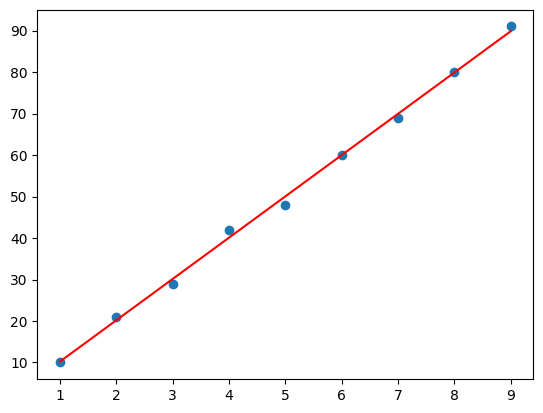

In [13]:
plt.scatter(data.ID,data.GPA)
plt.plot(x.numpy(),model(x).data.numpy(),c="red")